# Outlier Detection using Box plot

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('placement_dataset.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [3]:
df.shape

(1000, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


<AxesSubplot:xlabel='placement_exam_marks', ylabel='Density'>

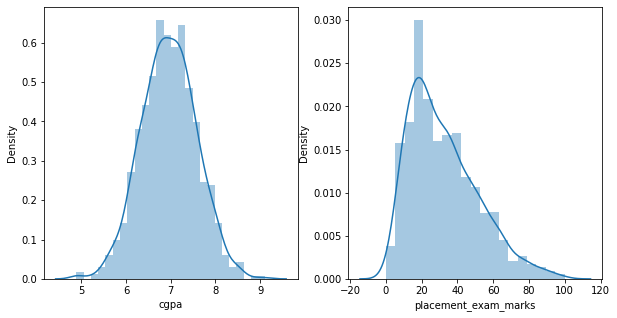

In [5]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

In [6]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [7]:
df['cgpa'].skew()

-0.014529938929314918

## feature - 'placement_exam_marks' qualifies for IQR based outlier treatment method

In [8]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

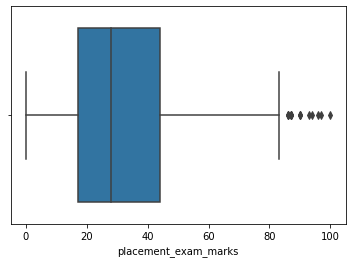

In [9]:
sns.boxplot(df['placement_exam_marks'])
plt.show()

In [26]:
#Finding the IQR

Q1 = df['placement_exam_marks'].quantile(0.25)
Q3 = df['placement_exam_marks'].quantile(0.75)

IQR = Q3-Q1

upper_limit = Q3+1.5*IQR
lower_limit = Q1-1.5*IQR

print('lower limit: ', lower_limit)
print('upper limit: ', upper_limit)
print('IQR:' , IQR)

lower limit:  -23.5
upper limit:  84.5
IQR: 27.0


In [12]:
df[(df['placement_exam_marks']>upper_limit) | (df['placement_exam_marks']<lower_limit)]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


# Outlier Treatment
# Trimming

In [13]:
df_new = df[~(df['placement_exam_marks']>upper_limit) | (df['placement_exam_marks']<lower_limit)]

In [14]:
df_new

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


<AxesSubplot:xlabel='placement_exam_marks'>

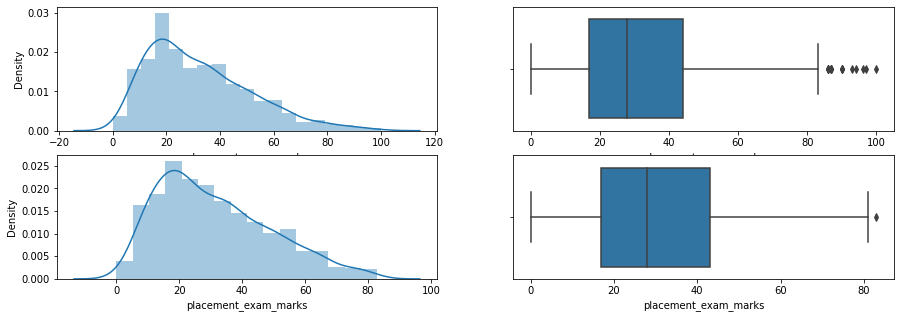

In [15]:
plt.figure(figsize=(15,5))

plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(df_new['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(df_new['placement_exam_marks'])

# Capping

In [22]:
upper_limit = 84.5
lower_limit = -23.5

df_cap = df.copy()

df_cap['placement_exam_marks'] = np.where(df_cap['placement_exam_marks']>upper_limit, upper_limit , df_cap['placement_exam_marks']) 
df_cap['placement_exam_marks'] = np.where(df_cap['placement_exam_marks']<lower_limit , lower_limit , df_cap['placement_exam_marks'])

In [23]:
df_cap['placement_exam_marks'].max()

84.5

In [24]:
df_cap['placement_exam_marks'].min()

0.0

<AxesSubplot:xlabel='placement_exam_marks'>

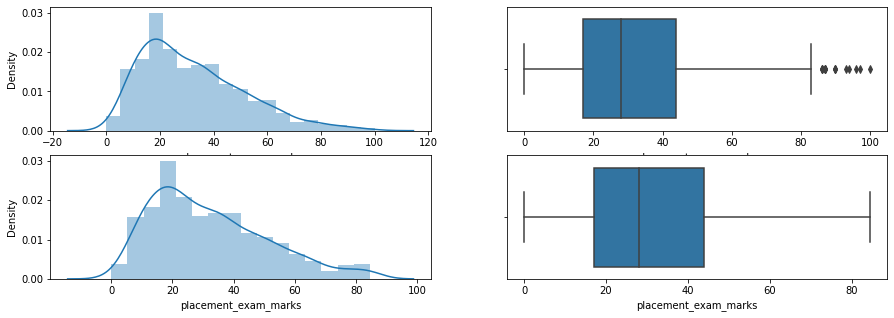

In [25]:
plt.figure(figsize=(15,5))

plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(df_cap['placement_exam_marks'])